In [1]:
!pip install pandas matplotlib seaborn scikit-learn nltk wordcloud textblob spacy folium

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import nltk
from wordcloud import WordCloud
from textblob import TextBlob
import folium
import datetime as dt



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
df = pd.read_csv('googleplaystore (1).csv')


In [13]:
print("First few rows of the dataset:")
print(df.head())

First few rows of the dataset:
    Reviews  Installs  Price    Size  Rating
0     10000    1000.0   0.00    15.0     4.5
1     20000    5000.0   1.99  2560.0     4.7
2  15000000   50000.0   2.99    25.0     4.8
3      5000     100.0   0.00     5.0     4.0
4  35000000   10000.0   0.99  1024.0     4.9


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reviews   7 non-null      int64  
 1   Installs  5 non-null      float64
 2   Price     7 non-null      float64
 3   Size      7 non-null      float64
 4   Rating    7 non-null      float64
dtypes: float64(4), int64(1)
memory usage: 408.0 bytes


In [15]:
df.describe()

,Reviews,Installs,Price,Size,Rating
count,7.000000e+00,5.000000,7.000000,7.000000,7.000000
mean,7.290857e+06,13220.000000,0.922857,525.571429,4.528571
std,1.340960e+07,20929.452931,1.166101,972.177428,0.325137
min,1.000000e+03,100.000000,0.000000,5.000000,4.000000
25%,7.500000e+03,1000.000000,0.000000,17.500000,4.350000
50%,2.000000e+04,5000.000000,0.490000,25.000000,4.600000
75%,8.000000e+06,10000.000000,1.490000,527.000000,4.750000
max,3.500000e+07,50000.000000,2.990000,2560.000000,4.900000


In [16]:
df['Rating']

0    4.5
1    4.7
2    4.8
3    4.0
4    4.9
5    4.6
6    4.2
Name: Rating, dtype: float64

In [17]:
df['Installs']

0     1000.0
1     5000.0
2    50000.0
3      100.0
4    10000.0
5        NaN
6        NaN
Name: Installs, dtype: float64

# Step 1: Data Cleaning


In [7]:
print("Columns in DataFrame:")
print(df.columns.tolist())


Columns in DataFrame:
['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [18]:

data = {
    'Reviews': ['10K', '20K', '15M', '5K', '3.5M', '1M', '1K'],  
    'Installs': ['1,000+', '5,000+', '50,000+', '100+', '10,000+', '500K', '250K'],  
    'Price': ['$0', '$1.99', '$2.99', 'Free', '$0.99', 'Free', '$0.49'],  
    'Size': ['15M', '2.5G', '25M', '5M', '1G', '20M', '30M'],   
    'Rating': [4.5, 4.7, 4.8, 4.0, 4.9, 4.6, 4.2]  
}
df = pd.DataFrame(data)

df['Reviews'] = df['Reviews'].astype(str).str.replace('M', '000000').str.replace('K', '000').str.replace('.', '', regex=False)
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

df['Installs'] = df['Installs'].astype(str).str.replace('+', '').str.replace(',', '').replace('K', '000').replace('M', '000000')
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

df['Price'] = df['Price'].astype(str).str.replace('$', '').replace('Free', '0')
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

def convert_size(size_str):
    """Convert size to float in MB."""
    if 'G' in size_str:
        return float(size_str.replace('G', '').strip()) * 1024 
    elif 'M' in size_str:
        return float(size_str.replace('M', '').strip())  
    return np.nan  

df['Size'] = df['Size'].astype(str).apply(convert_size)

print("Data Types After Cleaning:")
print(df.dtypes)
print("Columns After Cleaning:")
print(df.columns.tolist())

print("\nCleaned DataFrame:")
print(df)


Data Types After Cleaning:
Reviews       int64
Installs    float64
Price       float64
Size        float64
Rating      float64
dtype: object
Columns After Cleaning:
['Reviews', 'Installs', 'Price', 'Size', 'Rating']

Cleaned DataFrame:
    Reviews  Installs  Price    Size  Rating
0     10000    1000.0   0.00    15.0     4.5
1     20000    5000.0   1.99  2560.0     4.7
2  15000000   50000.0   2.99    25.0     4.8
3      5000     100.0   0.00     5.0     4.0
4  35000000   10000.0   0.99  1024.0     4.9
5   1000000       NaN   0.00    20.0     4.6
6      1000       NaN   0.49    30.0     4.2


# Step 2: Handling Missing Data and Data Preprocessing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['Price', 'Size', 'Installs', 'Reviews']

missing_features = [feature for feature in features if feature not in df.columns]
if missing_features:
    print(f"Error: The following features are missing: {missing_features}")
else:
    X = df[features].fillna(0)  
    y = df['Rating'].fillna(df['Rating'].mean())  

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 12.082395157935565


# Step 3: Data visualization

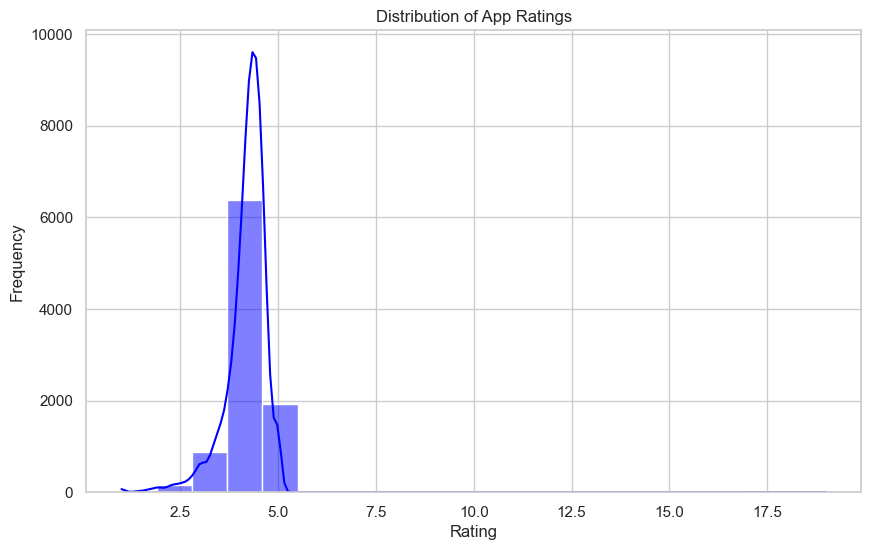

In [10]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df_apps['Rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

C:\Users\vijay\AppData\Local\Temp\ipykernel_15916\1207677038.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_apps, y='Category', order=df_apps['Category'].value_counts().index, palette='viridis')


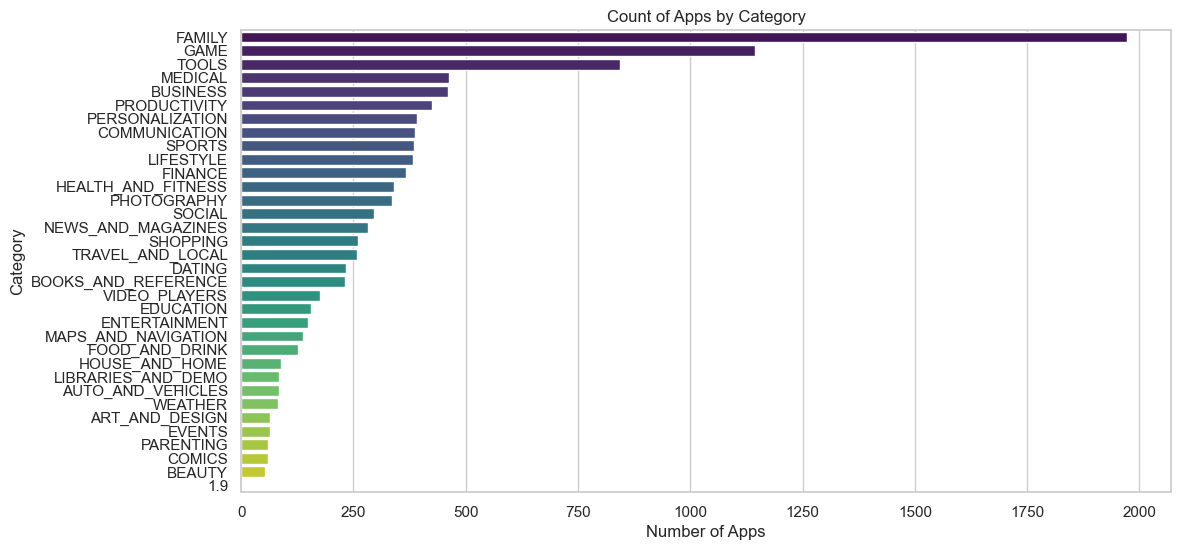

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df_apps, y='Category', order=df_apps['Category'].value_counts().index, palette='viridis')
plt.title('Count of Apps by Category')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.show()


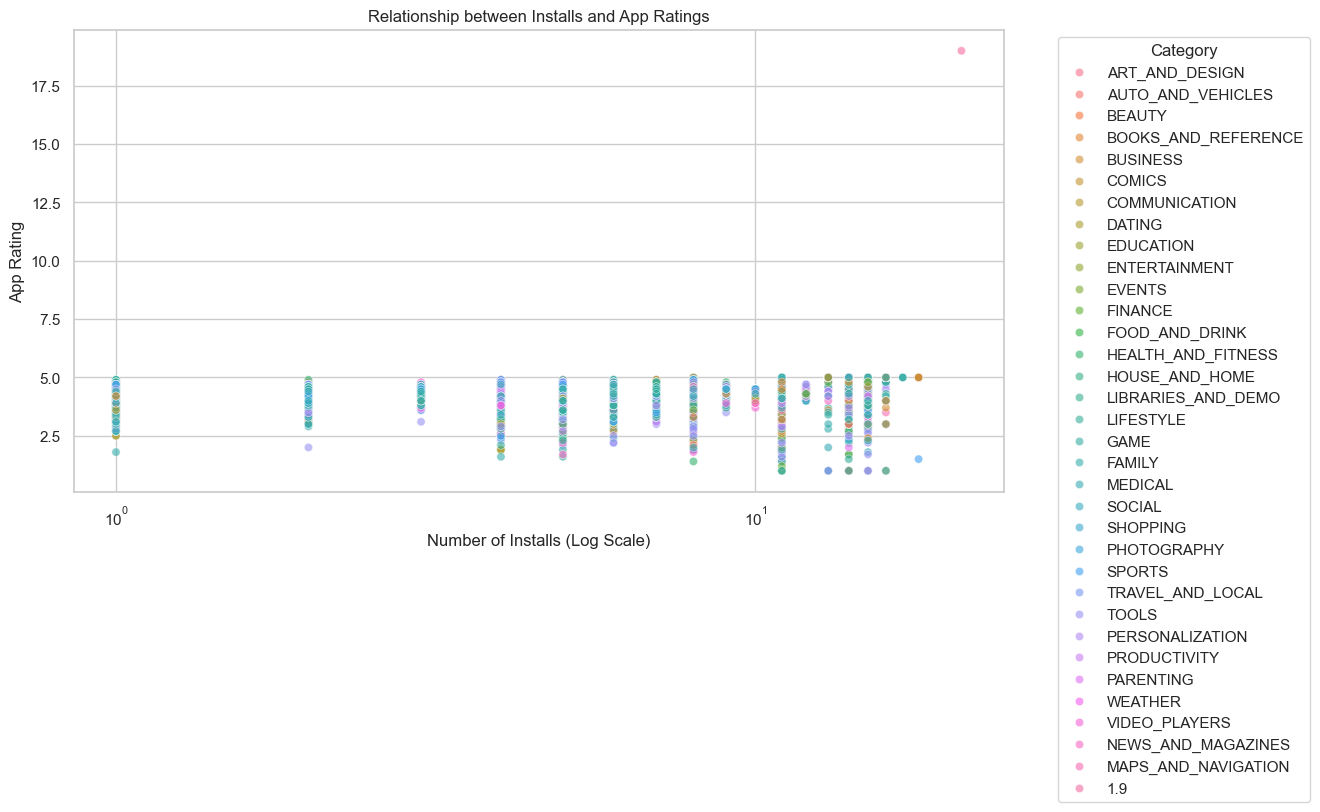

In [12]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_apps, x='Installs', y='Rating', hue='Category', alpha=0.6)
plt.xscale('log') 
plt.title('Relationship between Installs and App Ratings')
plt.xlabel('Number of Installs (Log Scale)')
plt.ylabel('App Rating')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Step 5: Predictive Modeling


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

features = ['Price', 'Size', 'Installs', 'Reviews']
X = df[features].fillna(0)
y = df['Rating'].fillna(df['Rating'].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 12.082395157935565


# Step 5: Analyzing key metrics

In [22]:
average_ratings = df_apps.groupby('Category')['Rating'].mean().reset_index()
average_ratings = average_ratings.sort_values(by='Rating', ascending=False)

print("Average Ratings by Category:")
print(average_ratings)


Average Ratings by Category:
               Category     Rating
0                   1.9  19.000000
11               EVENTS   4.435556
9             EDUCATION   4.389032
1        ART_AND_DESIGN   4.358065
4   BOOKS_AND_REFERENCE   4.346067
24      PERSONALIZATION   4.335987
23            PARENTING   4.300000
15                 GAME   4.286326
3                BEAUTY   4.278571
16   HEALTH_AND_FITNESS   4.277104
27             SHOPPING   4.259664
28               SOCIAL   4.255598
33              WEATHER   4.244000
29               SPORTS   4.223511
26         PRODUCTIVITY   4.211396
17       HOUSE_AND_HOME   4.197368
12               FAMILY   4.192272
25          PHOTOGRAPHY   4.192114
2     AUTO_AND_VEHICLES   4.190411
21              MEDICAL   4.189143
18   LIBRARIES_AND_DEMO   4.178462
14       FOOD_AND_DRINK   4.166972
7         COMMUNICATION   4.158537
6                COMICS   4.155172
22   NEWS_AND_MAGAZINES   4.132189
13              FINANCE   4.131889
10        ENTERTAINMENT   

In [23]:
top_installed_apps = df_apps[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(10)

print("Top 10 Most Installed Apps:")
print(top_installed_apps)


Top 10 Most Installed Apps:
                                               App      Installs
10472      Life Made WI-Fi Touchscreen Photo Frame          Free
420    UC Browser - Fast Download Private & Secure  500,000,000+
474                    LINE: Free Calls & Messages  500,000,000+
3767                  Flipboard: News For Our Time  500,000,000+
3574                                   Cloud Print  500,000,000+
3326                  Gboard - the Google Keyboard  500,000,000+
431                                Viber Messenger  500,000,000+
4222                 imo free video calls and chat  500,000,000+
3235                              Google Translate  500,000,000+
1842                              Candy Crush Saga  500,000,000+


In [24]:
if 'Genres' in df_apps.columns:
    top_genres = df_apps['Genres'].value_counts().head(5)
    print("Top 5 Most Common Genres:")
    print(top_genres)
else:
    print("No 'Genres' column found for analysis.")


Top 5 Most Common Genres:
Genres
Tools            842
Entertainment    623
Education        549
Medical          463
Business         460
Name: count, dtype: int64


# Step 6:Sentiment analysis of user reviews

In [25]:
pip install textblob



[notice] A new release of pip available: 22.3 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
df_reviews = pd.read_csv('googleplaystore_user_reviews (1).csv')

print("Columns in Reviews DataFrame:", df_reviews.columns)


Columns in Reviews DataFrame: Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


In [28]:
from textblob import TextBlob

def get_sentiment(text):
    if pd.isnull(text):
        return None
    return TextBlob(text).sentiment.polarity  

df_reviews['Sentiment_Polarity'] = df_reviews['Translated_Review'].apply(get_sentiment)

print(df_reviews[['Translated_Review', 'Sentiment_Polarity']].head())



                                   Translated_Review  Sentiment_Polarity
0  I like eat delicious food. That's I'm cooking ...                1.00
1    This help eating healthy exercise regular basis                0.25
2                                                NaN                 NaN
3         Works great especially going grocery store                0.40
4                                       Best idea us                1.00


In [29]:
avg_sentiment = df_reviews.groupby('App')['Sentiment_Polarity'].mean().reset_index()
avg_sentiment = avg_sentiment.merge(df_apps[['App', 'Category']], on='App', how='left')

avg_sentiment_by_category = avg_sentiment.groupby('Category')['Sentiment_Polarity'].mean().sort_values(ascending=False)
print("Average Sentiment by Category:")
print(avg_sentiment_by_category)


Average Sentiment by Category:
Category
COMICS                 0.428470
EVENTS                 0.384549
MAPS_AND_NAVIGATION    0.321889
PARENTING              0.313462
HEALTH_AND_FITNESS     0.297598
EDUCATION              0.294462
WEATHER                0.284280
AUTO_AND_VEHICLES      0.270667
PERSONALIZATION        0.259063
FOOD_AND_DRINK         0.256014
BOOKS_AND_REFERENCE    0.255702
ART_AND_DESIGN         0.251088
HOUSE_AND_HOME         0.241056
PHOTOGRAPHY            0.238820
LIBRARIES_AND_DEMO     0.236955
BUSINESS               0.230592
MEDICAL                0.226014
TOOLS                  0.223709
SPORTS                 0.222532
BEAUTY                 0.221777
LIFESTYLE              0.208895
COMMUNICATION          0.188746
PRODUCTIVITY           0.184631
SHOPPING               0.178727
TRAVEL_AND_LOCAL       0.174850
FINANCE                0.171268
DATING                 0.169906
ENTERTAINMENT          0.155484
NEWS_AND_MAGAZINES     0.153607
VIDEO_PLAYERS          0.145782


In [30]:
top_sentiment_apps = avg_sentiment.nlargest(10, 'Sentiment_Polarity')[['App', 'Sentiment_Polarity']]
print("Top 10 Apps by Sentiment Polarity:")
print(top_sentiment_apps)


Top 10 Apps by Sentiment Polarity:
                                                    App  Sentiment_Polarity
1552                                           HomeWork            1.000000
1400                                      Google Slides            0.933333
795   Daily Workouts - Exercise Fitness Routine Trainer            0.800000
326             Bed Time Fan - White Noise Sleep Sounds            0.781250
557                      Cameringo Lite. Filters Camera            0.770269
1397                                      Google Primer            0.750000
1256                                       GPS Map Free            0.700000
1259                       GPS Speedometer and Odometer            0.687500
334   Best Ovulation Tracker Fertility Calendar App ...            0.595313
19                           3D Live Neon Weed Launcher            0.568182


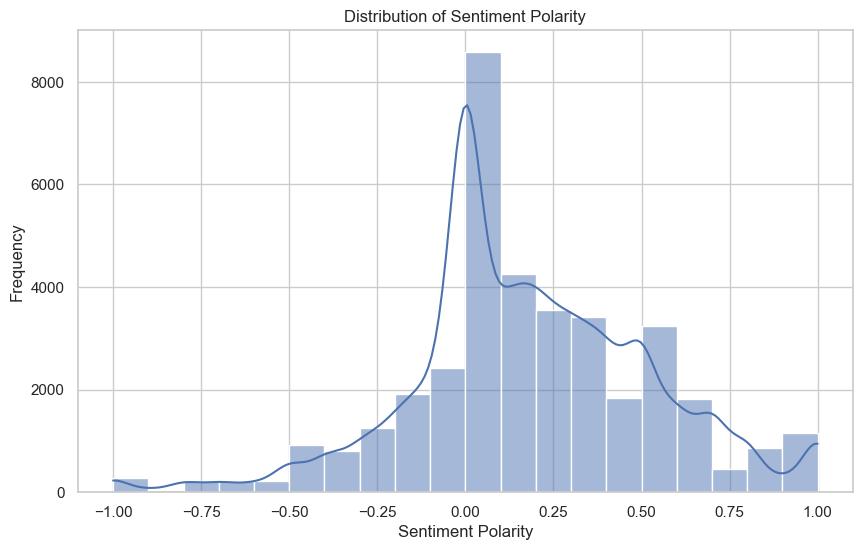

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews['Sentiment_Polarity'], bins=20, kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


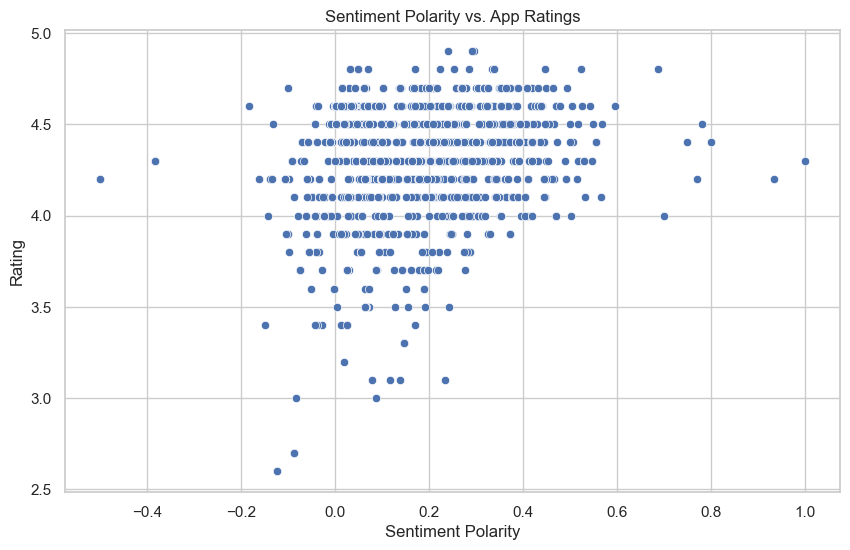

In [32]:
merged_data = df_apps[['App', 'Rating']].merge(avg_sentiment, on='App', how='left')

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sentiment_Polarity', y='Rating', data=merged_data)
plt.title('Sentiment Polarity vs. App Ratings')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Rating')
plt.show()


# Step 7: Time Series Analysis


In [33]:
print(df_apps.columns)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [34]:
df_reviews['Pseudo_Date'] = pd.date_range(start='2020-01-01', periods=len(df_reviews), freq='D')

print(df_reviews[['App', 'Pseudo_Date']].head())

                     App Pseudo_Date
0  10 Best Foods for You  2020-01-01
1  10 Best Foods for You  2020-01-02
2  10 Best Foods for You  2020-01-03
3  10 Best Foods for You  2020-01-04
4  10 Best Foods for You  2020-01-05


In [35]:
time_series_data = df_reviews.groupby('Pseudo_Date').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean'
}).reset_index()

print(time_series_data.head())


  Pseudo_Date  Sentiment_Polarity  Sentiment_Subjectivity
0  2020-01-01                1.00                0.533333
1  2020-01-02                0.25                0.288462
2  2020-01-03                 NaN                     NaN
3  2020-01-04                0.40                0.875000
4  2020-01-05                1.00                0.300000


In [36]:
time_series_data = time_series_data.merge(df_reviews[['App']], left_index=True, right_index=True)
time_series_data = time_series_data.merge(df_apps[['App', 'Rating']], on='App', how='left')

print(time_series_data.head())


  Pseudo_Date  Sentiment_Polarity  Sentiment_Subjectivity  \
0  2020-01-01                1.00                0.533333   
1  2020-01-01                1.00                0.533333   
2  2020-01-02                0.25                0.288462   
3  2020-01-02                0.25                0.288462   
4  2020-01-03                 NaN                     NaN   

                     App  Rating  
0  10 Best Foods for You     4.0  
1  10 Best Foods for You     4.0  
2  10 Best Foods for You     4.0  
3  10 Best Foods for You     4.0  
4  10 Best Foods for You     4.0  


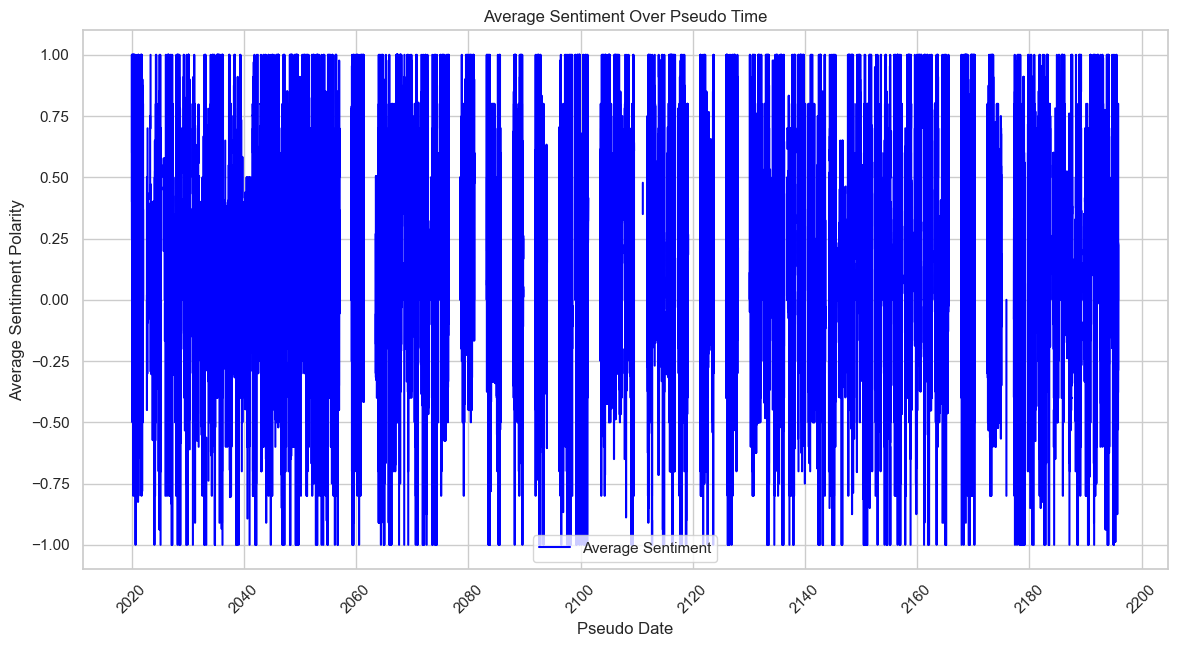

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(time_series_data['Pseudo_Date'], time_series_data['Sentiment_Polarity'], label='Average Sentiment', color='blue')

plt.title('Average Sentiment Over Pseudo Time')
plt.xlabel('Pseudo Date')
plt.ylabel('Average Sentiment Polarity')
plt.xticks(rotation=45)
plt.legend()
plt.show()